---
# Exploratory Data Analysis

#### Load data

In [2]:
import pandas as pd
# df = pd.read_csv('data/smap_input.csv')
df = pd.read_csv('data/bacia-camargos.csv')

# Data cleaning
df['Ep'] = df['Ep'].str.replace(',', '.').astype('float')
df['Pr'] = df['Pr'].str.replace(',', '.').astype('float')

df.set_index(pd.to_datetime(df['data']), inplace=True)
df.drop('data', axis=1, inplace=True)

df.head()

,Qobs,Ep,Pr
data,,,
1995-01-01,204,4.94,4.3
1995-01-02,181,4.94,9.1
1995-01-03,176,4.94,22.8
1995-01-04,194,4.94,9.2
1995-01-05,198,4.94,1.7


### 1. **Line Plot of Qobs, Pr, and Ep Over Time (Side by Side)**

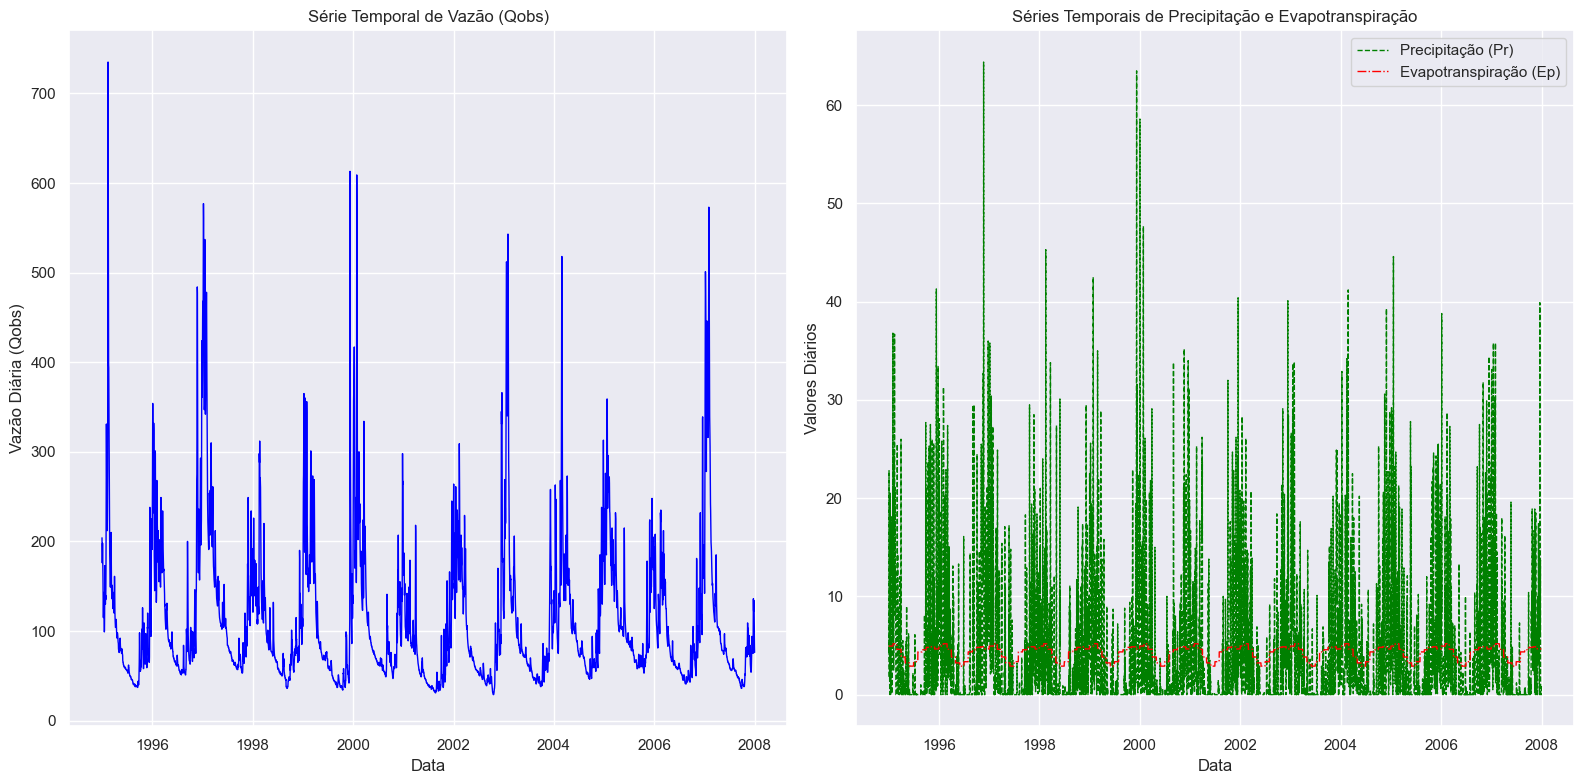

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Line plot of Qobs, Pr, and Ep over time (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Qobs
axes[0].plot(df.index, df['Qobs'], label='Vazão (Qobs)', color='blue', linewidth=1)
axes[0].set_title('Série Temporal de Vazão (Qobs)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Vazão Diária (Qobs)')
axes[0].grid(True)

# Plot for Pr and Ep
axes[1].plot(df.index, df['Pr'], label='Precipitação (Pr)', color='green', linestyle='--', linewidth=1)
axes[1].plot(df.index, df['Ep'], label='Evapotranspiração (Ep)', color='red', linestyle='-.', linewidth=1)
axes[1].set_title('Séries Temporais de Precipitação e Evapotranspiração')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Valores Diários')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 2. **Annual Precipitation, Evapotranspiration, and Water Throughput (Side by Side)**

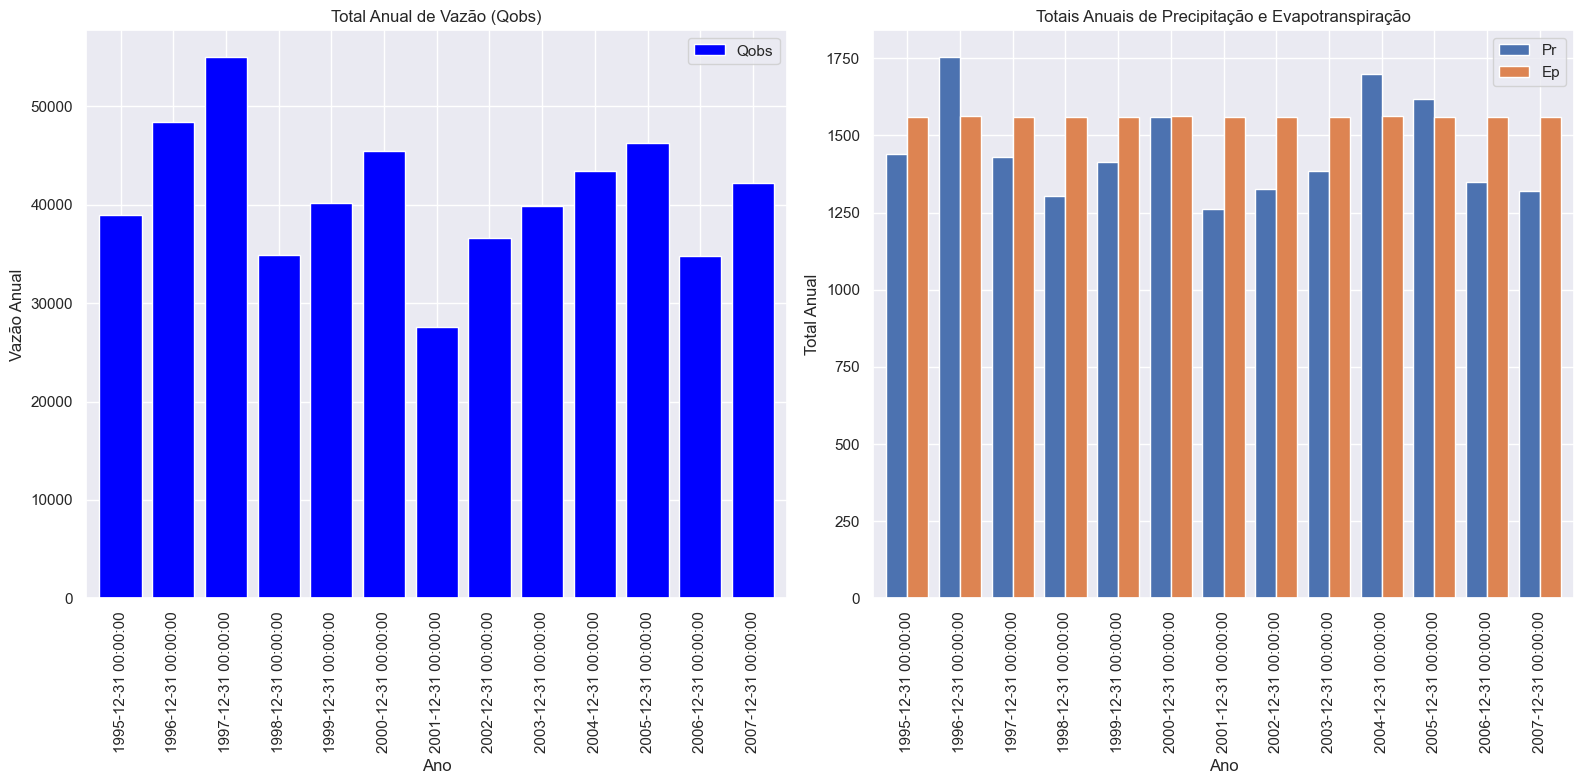

In [6]:
# Resampling by year and summing values
df_yearly = df.resample('Y').sum()

# Side-by-side bar plots for annual totals
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for Qobs
df_yearly[['Qobs']].plot(kind='bar', ax=axes[0], width=0.8, color='blue')
axes[0].set_title('Total Anual de Vazão (Qobs)')
axes[0].set_ylabel('Vazão Anual')
axes[0].set_xlabel('Ano')
axes[0].grid(True)

# Bar plot for Pr and Ep
df_yearly[['Pr', 'Ep']].plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Totais Anuais de Precipitação e Evapotranspiração')
axes[1].set_ylabel('Total Anual')
axes[1].set_xlabel('Ano')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3. **Monthly Boxplot for Seasonal Variability (Side by Side)**

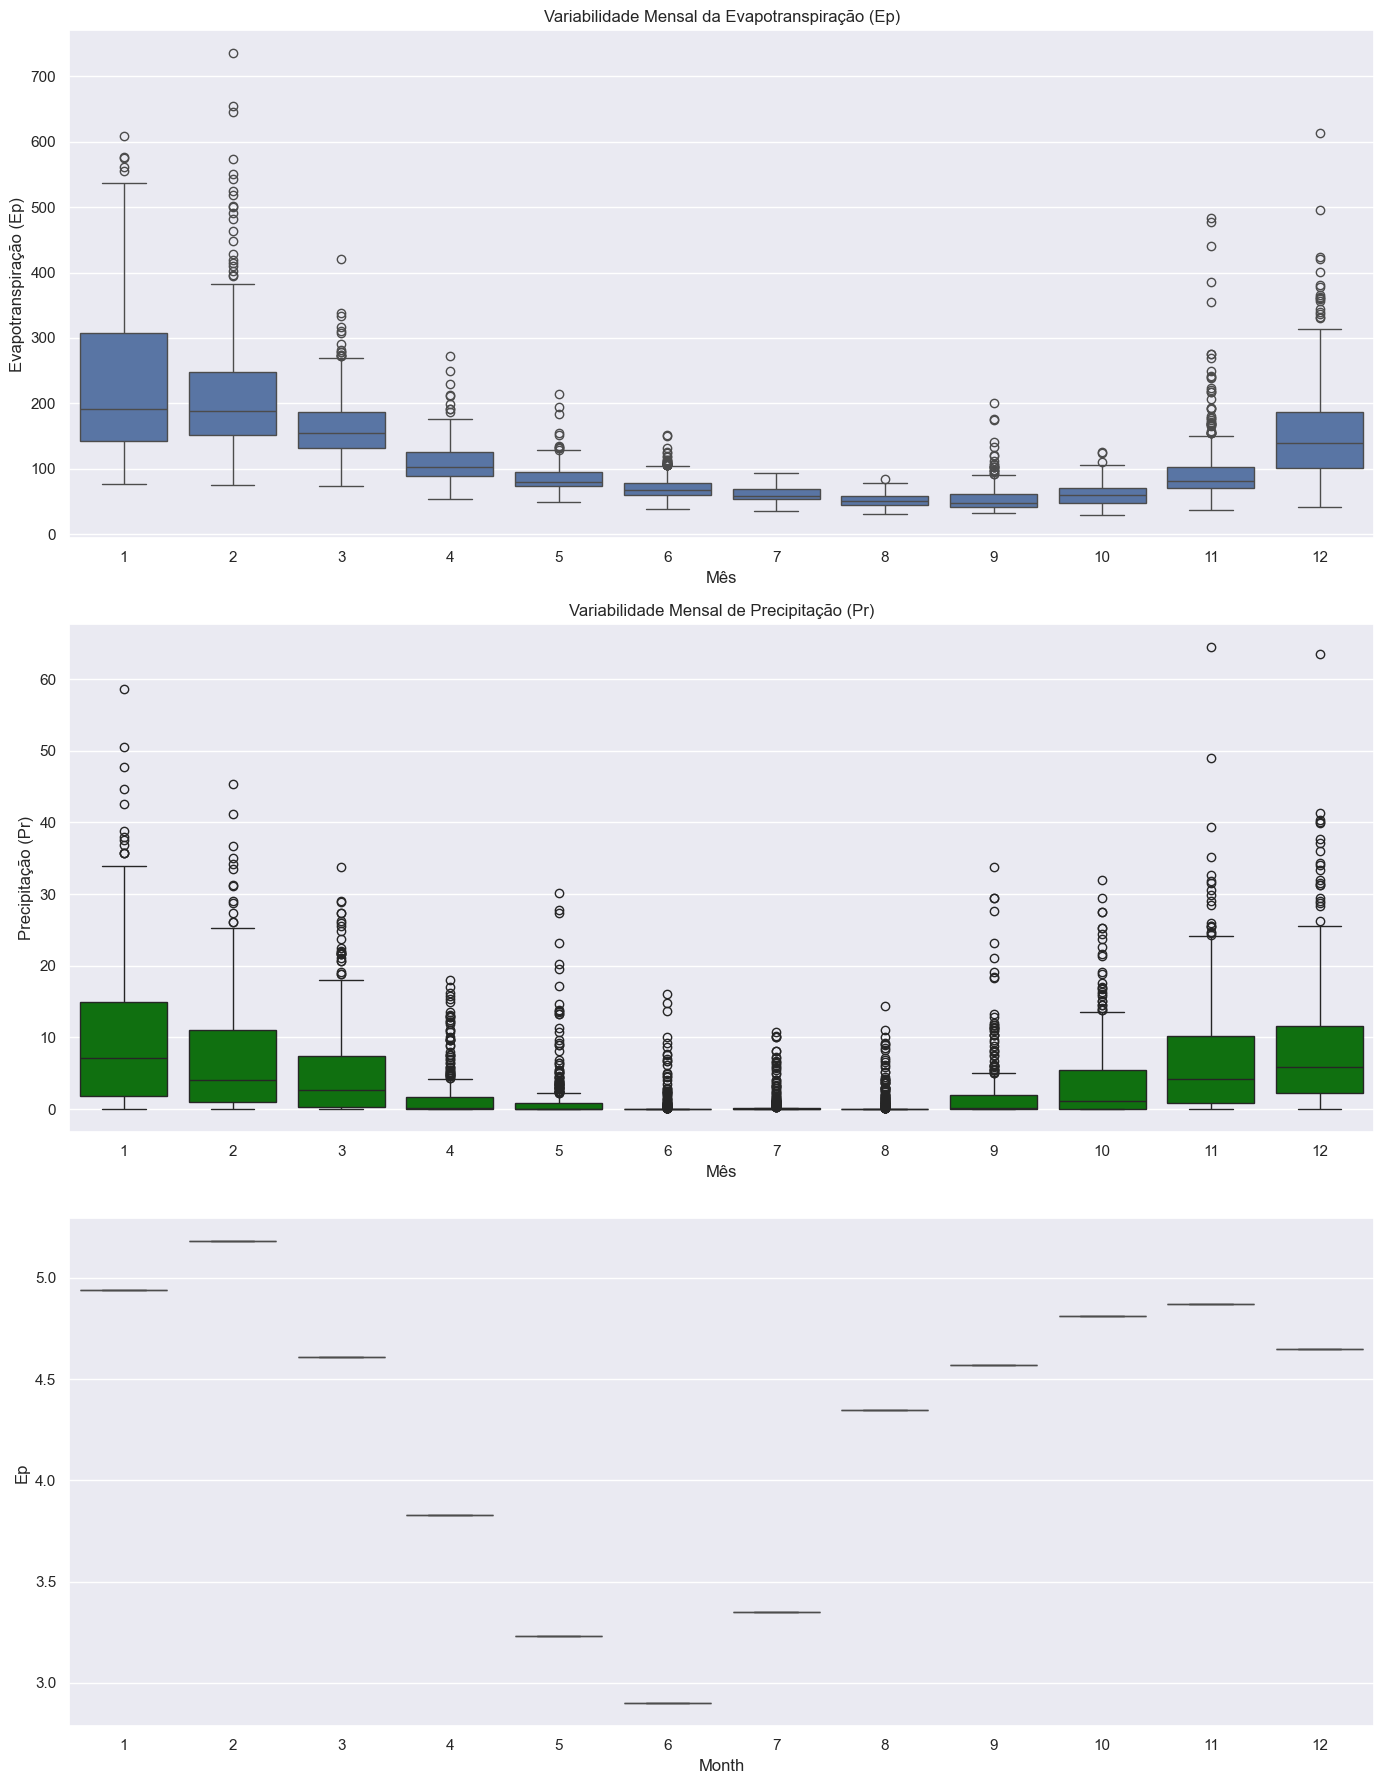

In [11]:
# Extract month from index
df['Month'] = df.index.month

# Side-by-side boxplots for seasonal variability
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Boxplot for Qobs
sns.boxplot(x='Month', y='Qobs', data=df, ax=axes[0])
axes[0].set_title('Variabilidade Mensal da Vazão (Qobs)')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Vazão (Qobs)')

# Boxplot for Pr
sns.boxplot(x='Month', y='Pr', data=df, ax=axes[1], color='green')
axes[1].set_title('Variabilidade Mensal de Precipitação (Pr)')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Precipitação (Pr)')

# Boxplot for Ep
sns.boxplot(x='Month', y='Ep', data=df, ax=axes[2], color='red')
axes[0].set_title('Variabilidade Mensal da Evapotranspiração (Ep)')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Evapotranspiração (Ep)')

plt.tight_layout()
plt.show()

### 4. **Scatter Plot of Precipitation vs. Water Throughput (Side by Side)**

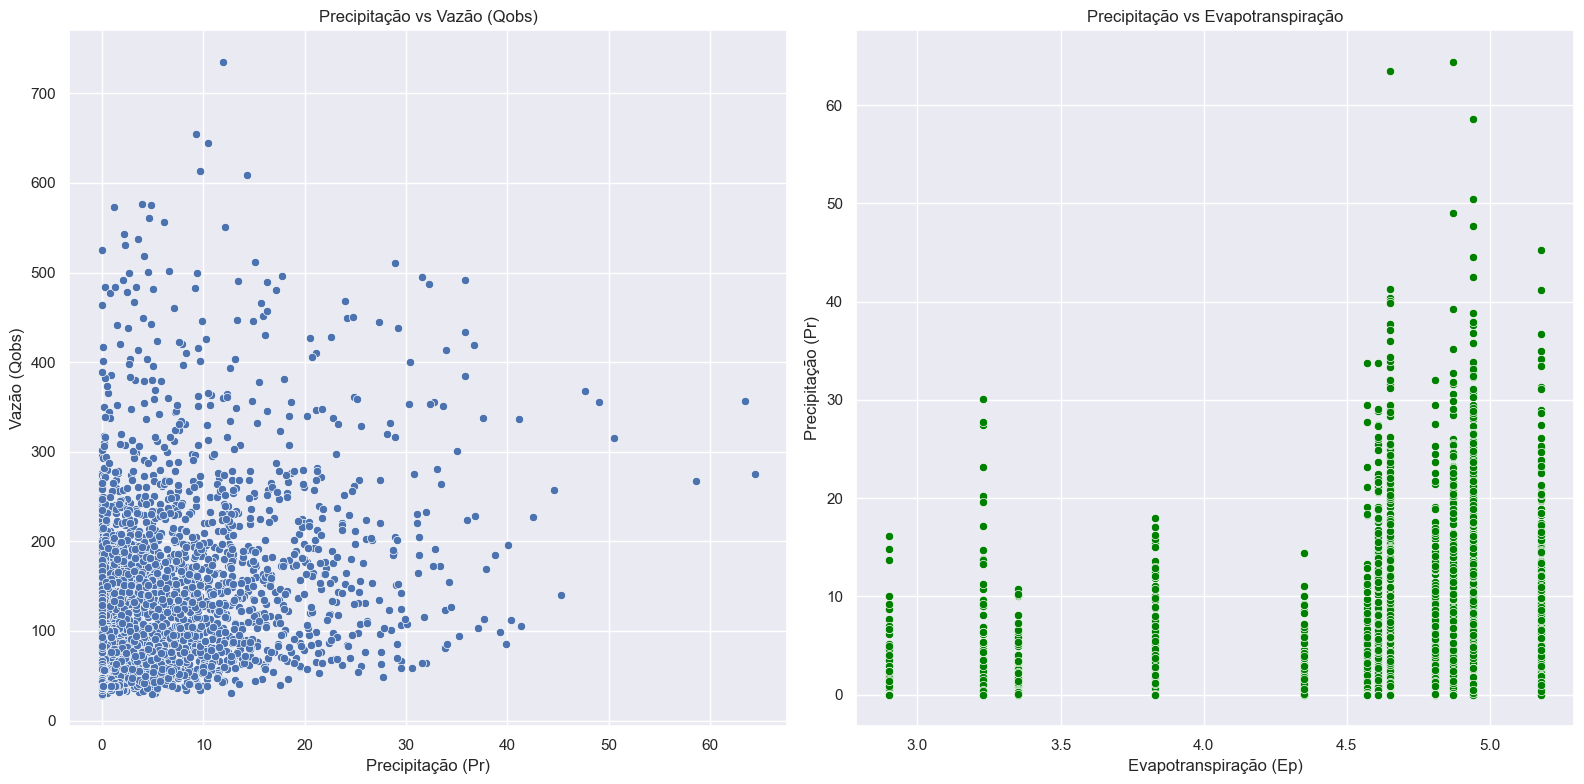

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for Qobs vs Pr
sns.scatterplot(x='Pr', y='Qobs', data=df, ax=axes[0])
axes[0].set_title('Precipitação vs Vazão (Qobs)')
axes[0].set_xlabel('Precipitação (Pr)')
axes[0].set_ylabel('Vazão (Qobs)')
axes[0].grid(True)

# Scatter plot for Pr vs Ep
sns.scatterplot(x='Ep', y='Pr', data=df, ax=axes[1], color='green')
axes[1].set_title('Precipitação vs Evapotranspiração')
axes[1].set_xlabel('Evapotranspiração (Ep)')
axes[1].set_ylabel('Precipitação (Pr)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 5. **Correlation Heatmap (Separate)**

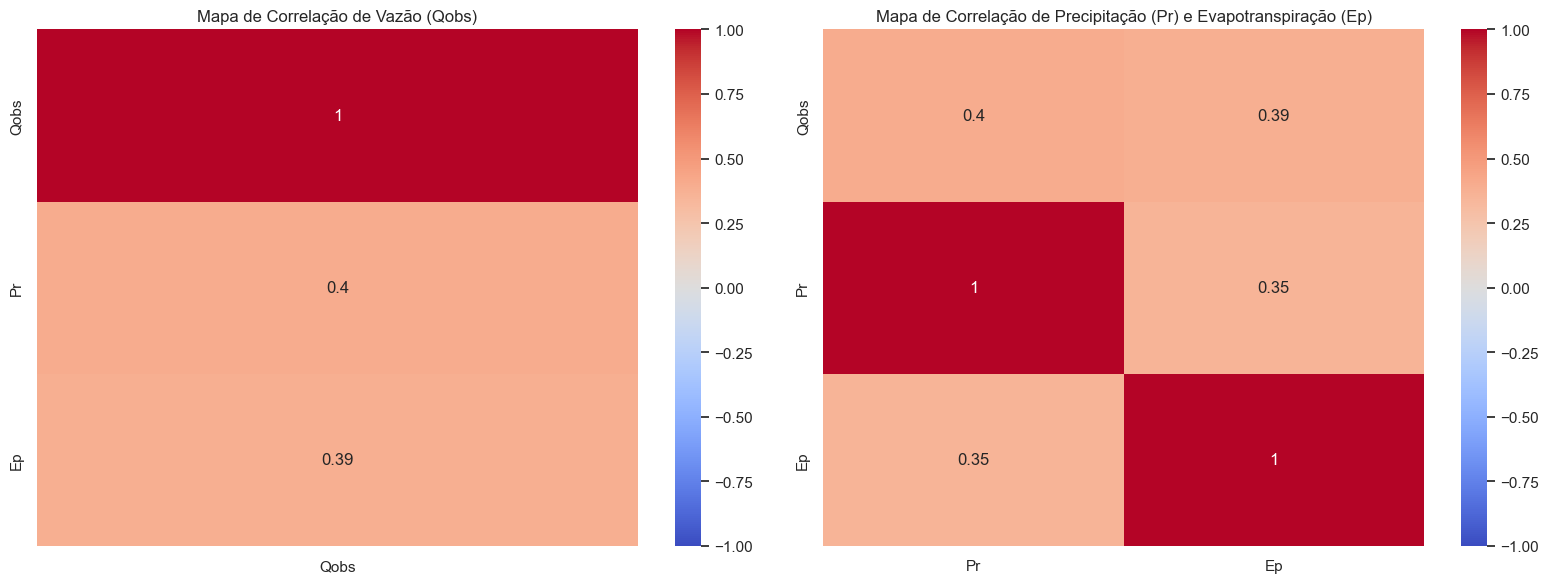

In [9]:
# Compute the correlation matrix
corr = df[['Qobs', 'Pr', 'Ep']].corr()

# Plot heatmap for Qobs and separately for Pr and Ep
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Qobs
sns.heatmap(corr[['Qobs']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Mapa de Correlação de Vazão (Qobs)')

# Heatmap for Pr and Ep
sns.heatmap(corr[['Pr', 'Ep']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Mapa de Correlação de Precipitação (Pr) e Evapotranspiração (Ep)')

plt.tight_layout()
plt.show()

### 6. **Rolling Mean of Qobs, Pr, and Ep (30-Day Window, Side by Side)**

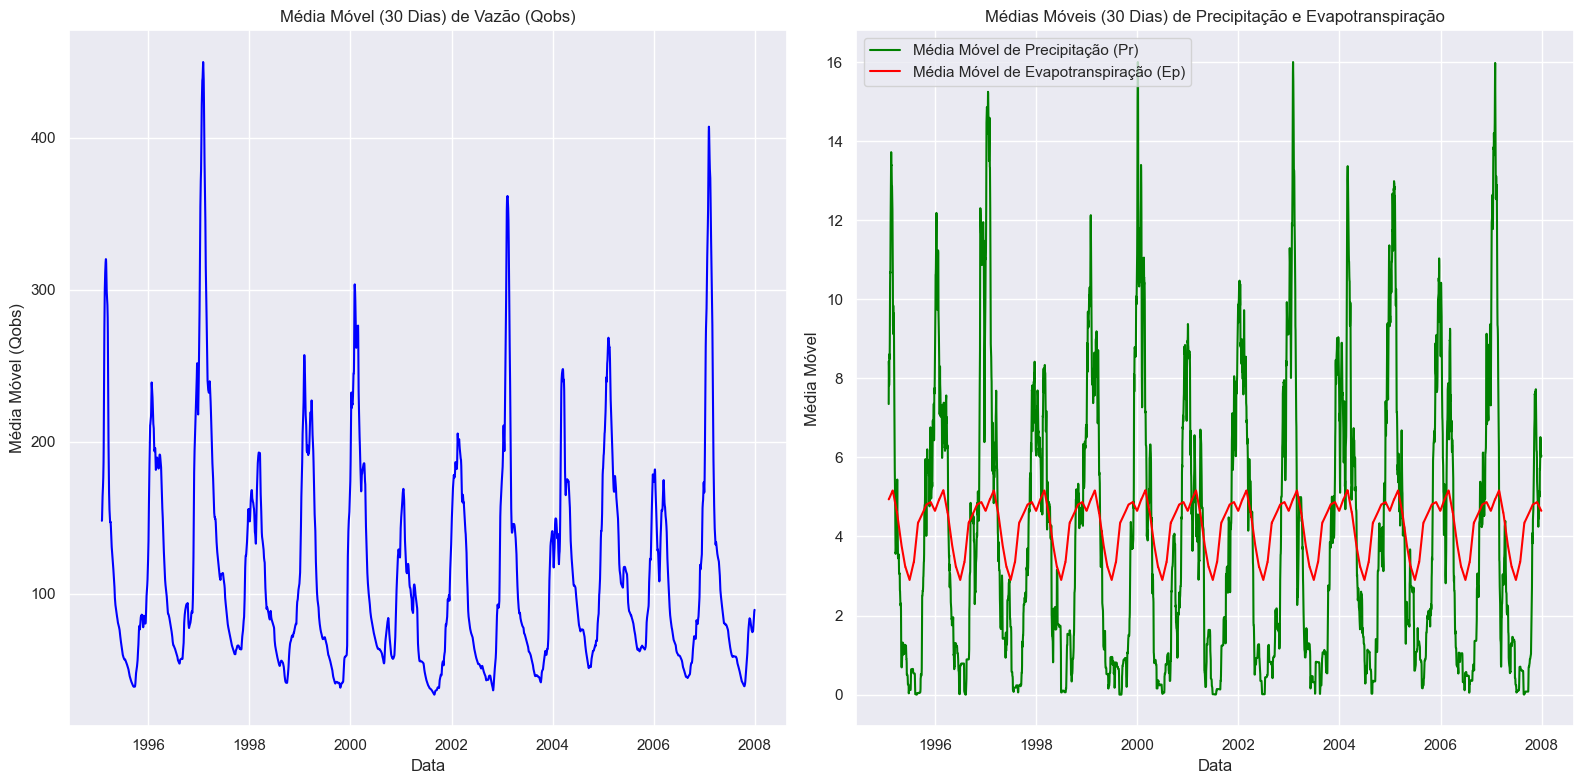

In [10]:
df_rolling = df[['Qobs', 'Pr', 'Ep']].rolling(window=30).mean()

# Side-by-side plot for rolling averages
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Rolling mean for Qobs
axes[0].plot(df_rolling.index, df_rolling['Qobs'], label='Média Móvel de Vazão (Qobs)', color='blue')
axes[0].set_title('Média Móvel (30 Dias) de Vazão (Qobs)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Média Móvel (Qobs)')
axes[0].grid(True)

# Rolling mean for Pr and Ep
axes[1].plot(df_rolling.index, df_rolling['Pr'], label='Média Móvel de Precipitação (Pr)', color='green')
axes[1].plot(df_rolling.index, df_rolling['Ep'], label='Média Móvel de Evapotranspiração (Ep)', color='red')
axes[1].set_title('Médias Móveis (30 Dias) de Precipitação e Evapotranspiração')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Média Móvel')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()